Custom filter

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

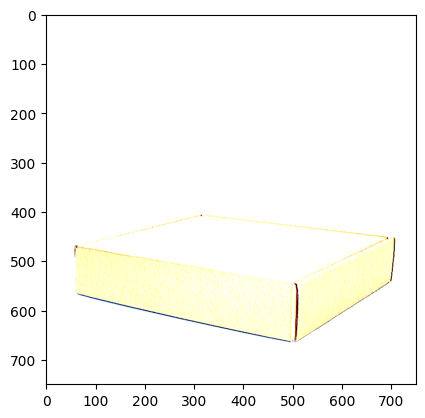

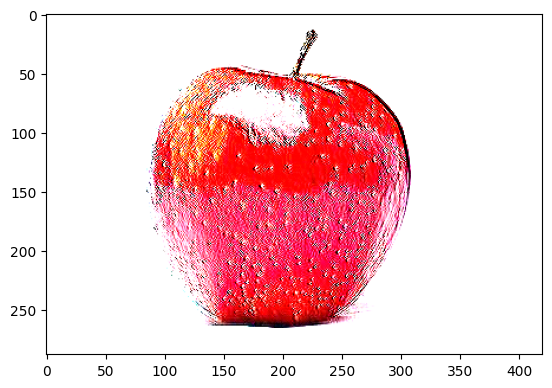

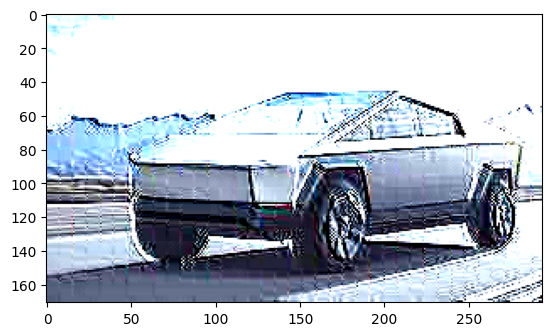

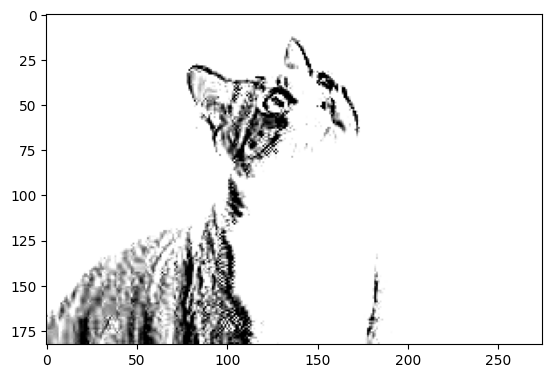

In [6]:
folder_path="./data"

img_list = glob.glob(os.path.join(folder_path, "*.png"))

for path in img_list:
    img = cv2.imread(path, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # plt.imshow(img)
    # plt.show()

    filter = np.array([[3, -2, -2],
                      [-3,7,-5],
                      [5,-1,0]])
    
    custom_filtered = cv2.filter2D(img, -1, filter)

    plt.imshow(custom_filtered)
    plt.show()

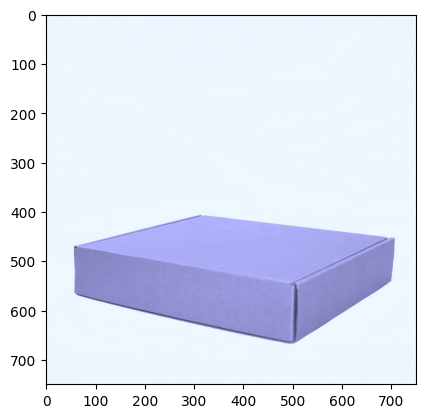

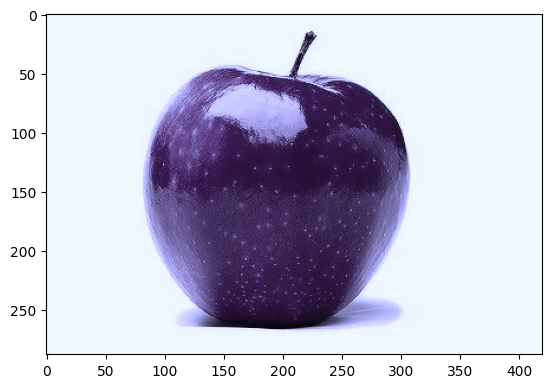

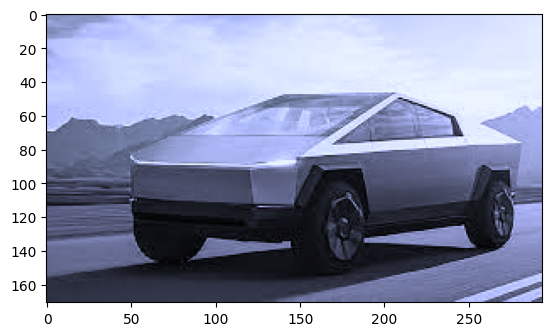

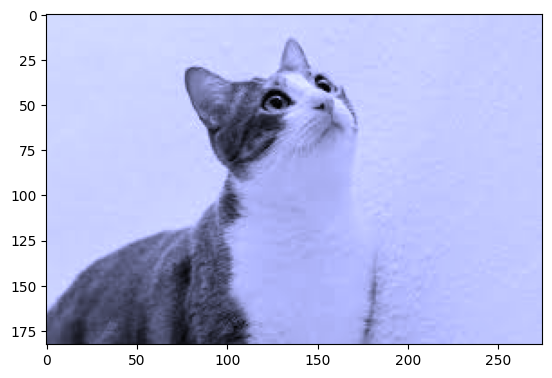

In [7]:
for path in img_list:
    img = cv2.imread(path, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # plt.imshow(img)
    # plt.show()

    filter_ = np.array([[0.272, 0.534, 0.131],
                      [0.119,0.686,0.168],
                      [0.393,0.769,0.189]])
    
    sepia_img = cv2.transform(img, filter_)

    plt.imshow(sepia_img)
    plt.show()

emboss effect

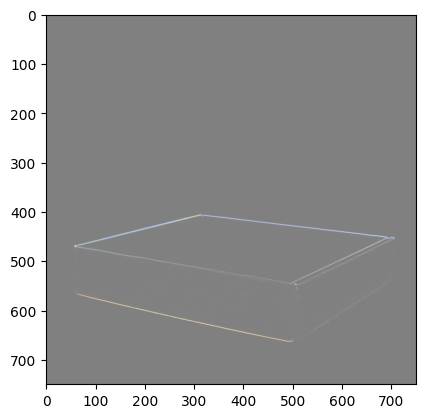

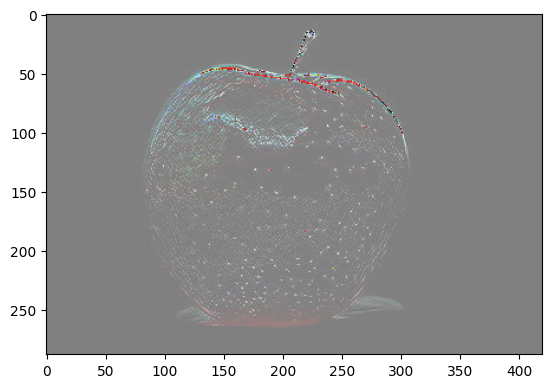

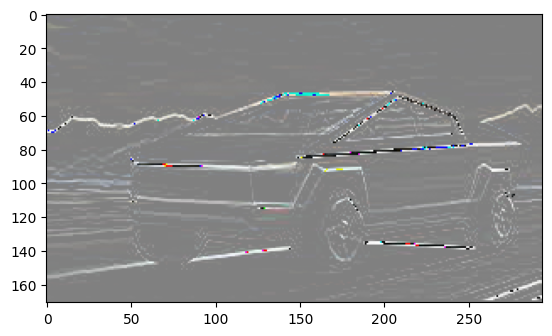

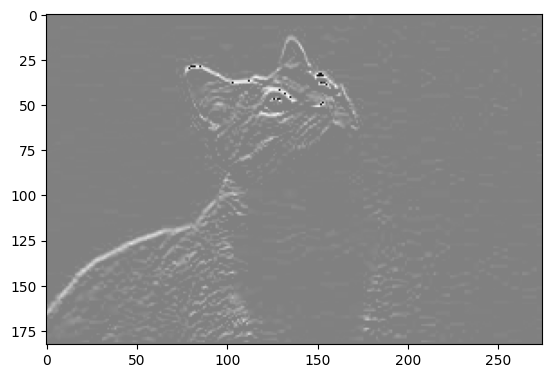

In [8]:
for path in img_list:
    img = cv2.imread(path, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # plt.imshow(img)
    # plt.show()

    filter_temp = np.array([[0, 1, 0],
                            [0,0,0],
                            [0,-1,0]])
    
    emboss_img = cv2.filter2D(img, -1, filter_temp)
    emboss_img = emboss_img + 128

    plt.imshow(emboss_img)
    plt.show()

Dilation, Erosion

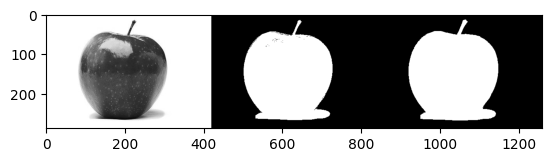

In [14]:
img_path = "./data/img_app.png"

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

_, mask = cv2.threshold(img, 230, 255, cv2.THRESH_BINARY_INV)

kernel = np.ones((3, 3), np.uint8)
dilation = cv2.dilate(mask,kernel)

img_list = np.hstack([
    img,
    mask,
    dilation
])

plt.imshow(img_list, 'gray')
plt.show()

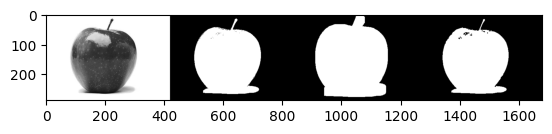

In [18]:
dilation = cv2.dilate(mask,kernel, iterations=10)
erosion = cv2.erode(mask, kernel)

img_list = np.hstack([
    img,
    mask,
    dilation,
    erosion
])

plt.imshow(img_list, 'gray')
plt.show()

Dilatation Erosion 04

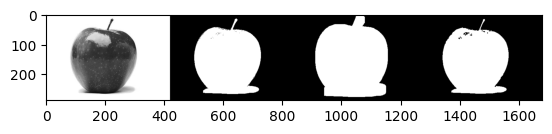

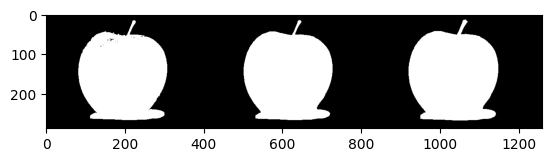

In [22]:
#open close
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
crossing = cv2.morphologyEx(mask, cv2.MORPH_CROSS, kernel) #start from typo

img_list = np.hstack([
    img,
    mask,
    dilation,
    erosion,
])
img_list2 = np.hstack([
    opening,
    closing,
    crossing
])

plt.imshow(img_list, 'gray')
plt.show()
plt.imshow(img_list2, 'gray')
plt.show()

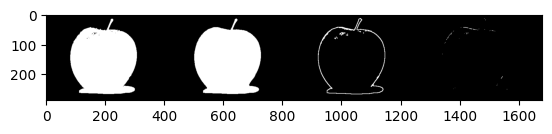

In [23]:
mg = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernel)
th = cv2.morphologyEx(mask, cv2.MORPH_TOPHAT, kernel)

img_list2 = np.hstack([
    opening,
    closing,
    mg,
    th
])

plt.imshow(img_list2, 'gray')
plt.show()

In [25]:
# !pip install pytesseract
import pytesseract

720 960


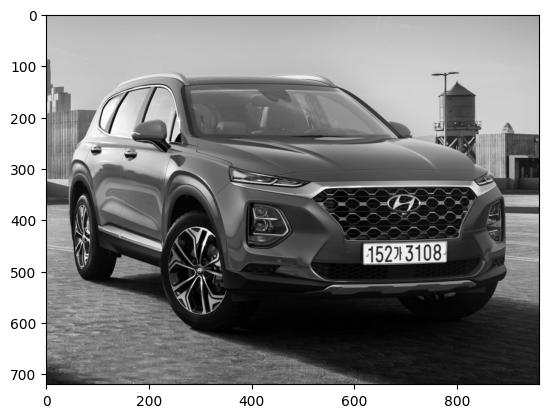

720 960 3


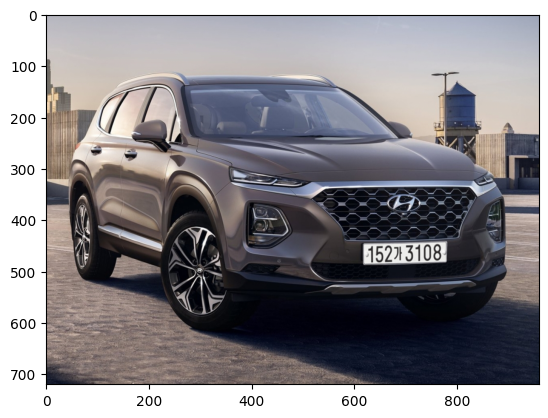

In [51]:
img_path = "./data/Car.png.png"
img_gray = cv2.imread(img_path, 0)

h, w= img_gray.shape
print(h, w)
plt.imshow(img_gray, 'gray')
plt.show()


img_path = "./data/Car.png.png"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

h, w, c= img.shape
print(h, w, c)
plt.imshow(img)
plt.show()

Car image - Maximize contrast

In [35]:
structuringElement = cv2.getStructuringElement(cv2.MORPH_RECT,(9, 9))
print(structuringElement)

[[1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]]


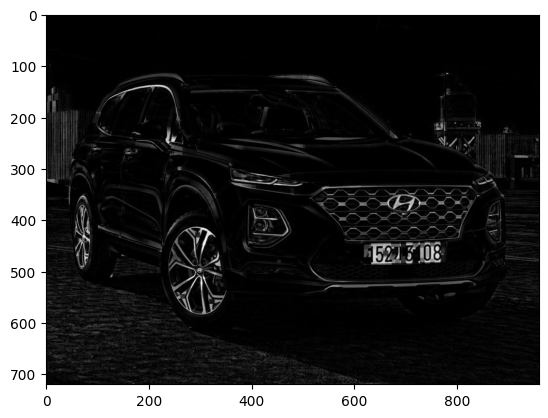

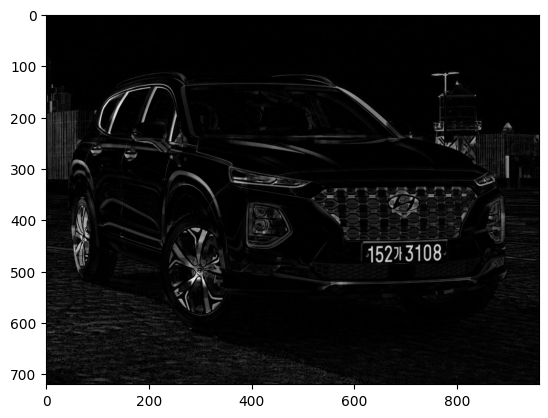

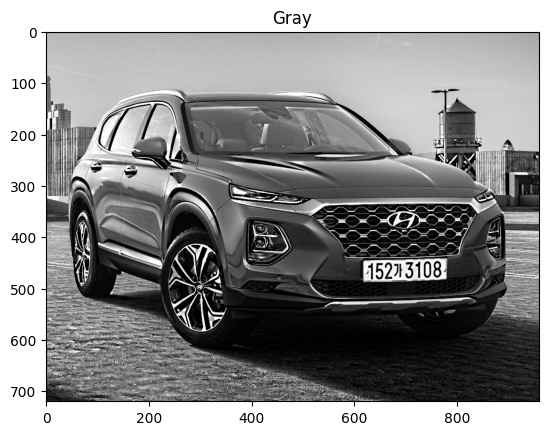

In [41]:
imgToHat = cv2.morphologyEx(img_gray, cv2.MORPH_TOPHAT,structuringElement)

plt.imshow(imgToHat, 'gray')
plt.show()
imgBlackHat = cv2.morphologyEx(img_gray, cv2.MORPH_BLACKHAT,structuringElement)

plt.imshow(imgBlackHat, 'gray')
plt.show()

imgGrayscalePlusTopHat =cv2.add(img_gray, imgToHat)
gray = cv2.subtract(imgGrayscalePlusTopHat, imgBlackHat)
plt.imshow(gray, 'gray')
plt.title("Gray")
plt.show()

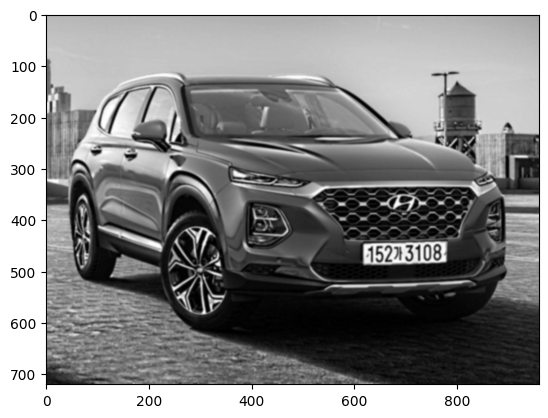

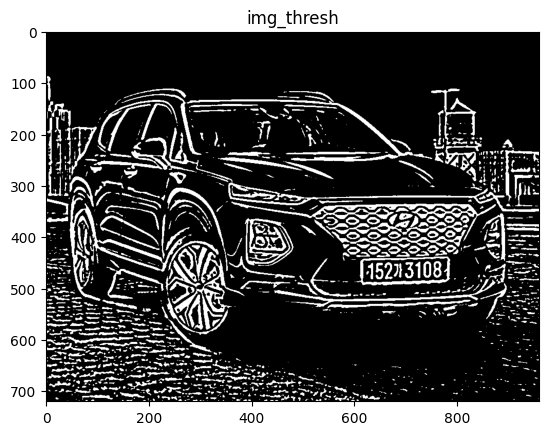

In [49]:
img_blurred = cv2.GaussianBlur(gray, ksize=(7,7), sigmaX=0)

plt.imshow(img_blurred, 'gray')
plt.show()

img_thresh = cv2.adaptiveThreshold(
    img_blurred,
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=19,
    C=9
)
plt.imshow(img_thresh, 'gray')
plt.title('img_thresh')
plt.show()

# 6. Car image preprocessing (bounding box lining)

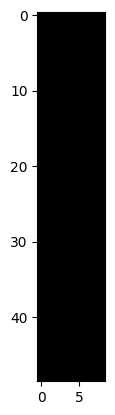

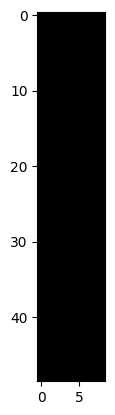

In [50]:
contours, hierarchy = cv2.findContours(
    img_thresh,
    mode=cv2.RETR_LIST,
    method=cv2.CHAIN_APPROX_SIMPLE
)
temp_res = np.zeros((h, w, c), dtype=np.uint8)

cv2.drawContours(temp_res, contours=contours, contourIdx=-1 , color=(255,255,255))
plt.imshow(temp_res,'gray')
plt.show()


temp_res = np.zeros((h, w, c), dtype=np.uint8)
contours_dict = []

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    # print(x, y, w, h)
    cv2.rectangle(temp_res, pt1=(x,y), pt2=(x+w,y+h), color=(255,255,255), thickness=2)

    #insert to dict
    contours_dict.append({
        'contour':contour,
        'x':x,
        'y':y,
        'w':w,
        'h':h,
        'cx':x+(w/2),
        'cy':y+(h/2)
    })

plt.imshow(temp_res,'gray')
plt.show()